In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import re
import os


from collections import namedtuple
Img = namedtuple('Img', ['path', 'tags'])

In [3]:
%matplotlib notebook

In [4]:
ls /home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg/

t10/  t2/  t4/  t6/  t8/


In [14]:
images

[Img(path='/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg2/t4/p2/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot', tags=['t4', 'p2', 'br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1']),
 Img(path='/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg2/t4/p1/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot', tags=['t4', 'p1', 'br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1']),
 Img(path='/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg2/t4/p3/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot', tags=['t4', 'p3', 'br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1']),
 Img(path='/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg2/t2/p2/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot', tags=['t2', 'p2', 'br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1']),
 Img(path='/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg2/t2/p1/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot', tags=['t2', 'p1', 'br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1']),
 Img(path='/home/lor

In [5]:
def find_images(tags):
    return [i.path for i in images if set(tags).issubset(set(i.tags))]



def restore(fig):
    global discarded_collections
    global discarded_lines
    fig.axes[0].lines += discarded_lines
    fig.axes[0].collections += discarded_collections
    discarded_lines = []
    discarded_collections = []
    plt.draw()

def select(selected, fig):
    global discarded_collections
    global discarded_lines
    restore(fig)
    for l, p in zip(fig.axes[0].lines,fig.axes[0].collections):
        print(l._label)
        if l._label not in selected:
            discarded_lines.append(l)
            discarded_collections.append(p)
    for p in discarded_collections:
        if p in fig.axes[0].collections:
            fig.axes[0].collections.remove(p)
    for l in discarded_lines:
        if l in fig.axes[0].lines:
            fig.axes[0].lines.remove(l)
    plt.draw()

In [7]:
find_images(['t4', 'p1'])[0]

'/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg/t4/p1/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot'

In [6]:
experiments_folder = "/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg/"
#experiments_folder = "/home/lorenzo/Scrivania/Experiments/Stackelberg_KnownStochastic/"
images = []
img_pattern = re.compile("^plot$")
for root, dirs, files in os.walk(experiments_folder):
    for f in files:
        if img_pattern.match(f):
            images.append(Img(os.path.join(root, f), root.split(experiments_folder)[1].split('/')))

<IPython.core.display.Javascript object>


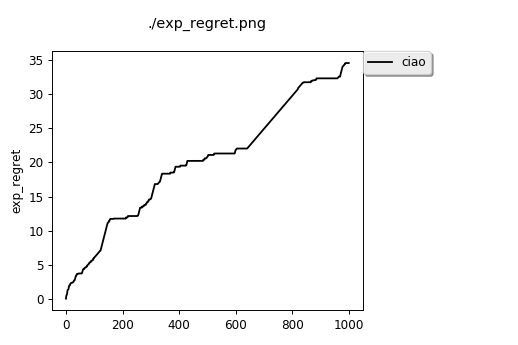

['ciao']


In [14]:
discarded_collections = []
discarded_lines = []
with open("plot", mode='r+b') as file:
    fig = pickle.load(file)
print([l._label for l in fig.axes[0].lines])

In [10]:
find_images(['t6', 'p2'])[0]

'/home/lorenzo/Scrivania/Experiments/UnknownStochastic_Stackelberg/t6/p2/br_mab1-1_br_expert1-1_b2bw2w1_holmes1-1/plot'

In [15]:
fig.canvas

In [76]:
select(['b2bw2w1_vs_sto', 'holmes1-1_vs_sto'],fig)

holmes1-1_vs_sto
br_mab1-1_vs_sto
br_expert1-1_vs_sto
b2bw2w1_vs_sto


In [99]:
import matplotlib

In [104]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [70]:
list(zip(fig.axes[0].lines,fig.axes[0].collections))

[(<matplotlib.lines.Line2D at 0x7fc838c5b198>,
  <matplotlib.collections.PolyCollection at 0x7fc838c73438>),
 (<matplotlib.lines.Line2D at 0x7fc838c5be48>,
  <matplotlib.collections.PolyCollection at 0x7fc838c732b0>),
 (<matplotlib.lines.Line2D at 0x7fc838c5bbe0>,
  <matplotlib.collections.PolyCollection at 0x7fc838ca2160>),
 (<matplotlib.lines.Line2D at 0x7fc838c5b208>,
  <matplotlib.collections.PolyCollection at 0x7fc838ca2780>)]

In [69]:
fig.axes[0].lines

In [68]:
restore(fig)

In [40]:
for i,a in  zip([1,2,3], [4,5,6]):
    print(i)

1
2
3


In [36]:
restore()

In [16]:
plt.close(fig)

In [31]:
fig.axes[0].collections.append(col)
plt.draw()